# Funcion de transferencia del motor
A partir de la aproximación realizada para el motor obtenemos:
$$
\frac{0.63}{s+6.85} \frac{N}{\%}
$$

In [1]:
pkg load control

In [2]:
m = tf([0.63], [1 6.85])


Transfer function 'm' from input 'u1' to output ...

        0.63  
 y1:  --------
      s + 6.85

Continuous-time model.


La inercia del brazo mecánico esta definida por la segunda ley de Newton, es decir:
$$
\frac{1}{2.12*s^{2}} \frac{m}{N}
$$

In [3]:
a = tf([1],[2.12 0 0])


Transfer function 'a' from input 'u1' to output ...

         1    
 y1:  --------
      2.12 s^2

Continuous-time model.


A su vez, el peso del brazo mecánico contraresta el empuje que puede realizar el motor. Teniendo todo esto en cuenta la función de lazo abierto queda

In [4]:
FLA=m*a
FLC=feedback(FLA,1)


Transfer function 'FLA' from input 'u1' to output ...

              0.63        
 y1:  --------------------
      2.12 s^3 + 14.52 s^2

Continuous-time model.

Transfer function 'FLC' from input 'u1' to output ...

                 0.63            
 y1:  ---------------------------
      2.12 s^3 + 14.52 s^2 + 0.63

Continuous-time model.


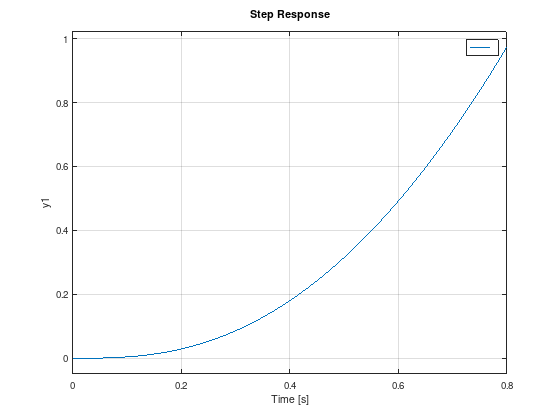

In [5]:
step(100*FLA)

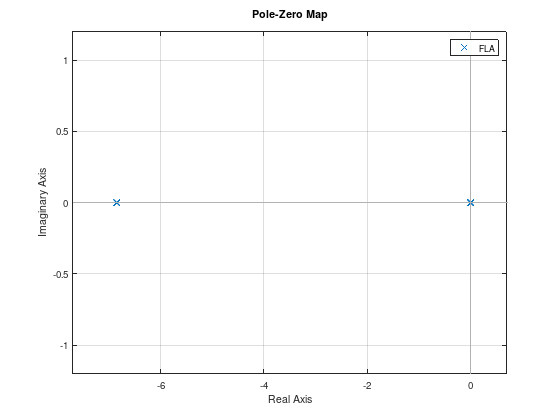

In [6]:
pzmap(FLA)

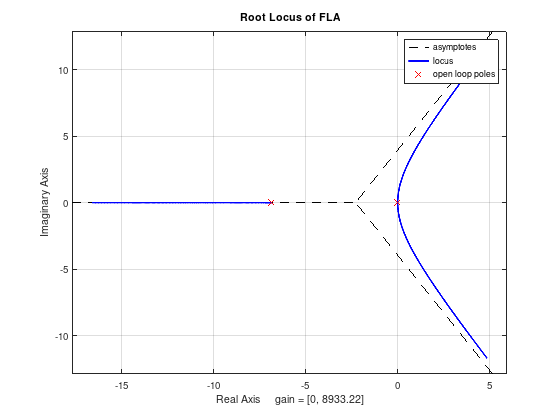

In [7]:
rlocus(FLA)

Nos encontramos con un sistema que posee dos polos en el origen. Notar que el sistema es inestable para todo valor de K en el lugar de raíces. Con el objetivo de lograr estabilidad, desplazamos el lugar de raices hacia la izquierda con la adicion de un cero en -1

$$ z_c = 1 $$
$$ C(s) = (s+1) $$



Transfer function 'c' from input 'u1' to output ...

 y1:  s

Continuous-time model.


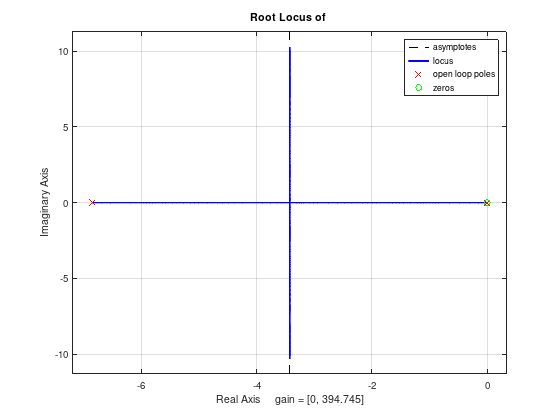

In [8]:
c = tf([1 0],1)
rlocus(FLA*c)